## Simple recommendation 

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
ratings=pd.read_excel(r'G:\Praxis\ML\material\csv files\ml-25m\ratings.xlsx')
movies=pd.read_csv(r'G:\Praxis\ML\material\csv files\ml-25m\movies.csv')
views=pd.read_excel(r'G:\Praxis\ML\material\csv files\ml-latest\views_count.xlsx')
tags=pd.read_csv(r'G:\Praxis\ML\material\csv files\ml-latest\tags.csv')

In [6]:
# Changing movie id's to single name for merging the dataframes 
rat=ratings.rename(columns={'Row Labels':'movieId'})
result=pd.merge(rat,movies,on='movieId')
result=pd.merge(result,views,on='movieId')

In [7]:
df=result.rename(columns={'Count of userId':"count"})
df=df.rename(columns={'Average of rating':"avg"})

In [9]:
movies['movieId'] = movies['movieId'].astype(int)
rat['movieId'] = rat['movieId'].astype(int)

In [10]:
# Average rating of all the observations
C = result['Average of rating'].mean()

In [13]:
#Setting treshold limit for number of views
m=df['count'].quantile(0.9)

In [14]:
#Removing all observations which are less than'm'
newdf=df.loc[df['count']>m]

In [15]:
print('shape of df:',df.shape)
print('shape of newdf:',newdf.shape)

shape of df: (16479, 5)
shape of newdf: (1645, 5)


In [16]:
#Weighted rating function
def weighted_rating(x, m=m, C=C):
    v = x['count']
    R = x['avg']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [17]:
weighted_rating(newdf)

0        3.863070
1        3.301311
2        3.188543
4        3.160607
5        3.784144
           ...   
15104    3.667512
15546    3.764960
15640    3.549210
15727    3.686761
16086    3.647031
Length: 1645, dtype: float64

In [18]:
newdf['score'] = newdf.apply(weighted_rating, axis=1)

C:\Users\N.VISHWANATH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
newdf = newdf.sort_values('score', ascending=False)

#Print the top 15 movies
newdf[['title', 'count', 'avg', 'score']].head(20)

,title,count,avg,score
310,"Shawshank Redemption, The (1994)",3582,4.436067,4.390096
799,"Godfather, The (1972)",2236,4.354253,4.287364
49,"Usual Suspects, The (1995)",2322,4.309235,4.247357
515,Schindler's List (1993),2662,4.276031,4.223380
1132,"Godfather: Part II, The (1974)",1454,4.313781,4.217937
2728,Fight Club (1999),2373,4.226285,4.170497
1106,One Flew Over the Cuckoo's Nest (1975),1535,4.236370,4.151906
288,Pulp Fiction (1994),3410,4.182417,4.144706
2362,"Matrix, The (1999)",3117,4.160738,4.120618
704,Dr. Strangelove or: How I Learned to Stop Worr...,1031,4.220139,4.101564


## Cluster profiling 

In [3]:
ratings=pd.read_excel(r'G:\Praxis\ML\material\csv files\ml-25m\ratings.xlsx')
movies=pd.read_csv(r'G:\Praxis\ML\material\csv files\ml-25m\movies.csv')
views=pd.read_excel(r'G:\Praxis\ML\material\csv files\ml-latest\views_count.xlsx')
tags=pd.read_csv(r'G:\Praxis\ML\material\csv files\ml-latest\tags.csv')

rat=ratings.rename(columns={'Row Labels':'movieId'})
result=pd.merge(rat,movies,on='movieId')
result=pd.merge(result,views,on='movieId')

df=result.rename(columns={'Count of userId':"count"})
df=df.rename(columns={'Average of rating':"avg"})

In [193]:
df.head()

,movieId,avg,title,genres,count
0,1,3.896957,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2573
1,2,3.305830,Jumanji (1995),Adventure|Children|Fantasy,1021
2,3,3.169524,Grumpier Old Men (1995),Comedy|Romance,629
3,4,2.943299,Waiting to Exhale (1995),Comedy|Drama|Romance,129
4,5,3.133462,Father of the Bride Part II (1995),Comedy,592


In [4]:
#splitting the genres from genres col
df["genres"]=df.genres.str.split("|") 

In [5]:
for i,row in df.iterrows():
    for genre in row['genres']:
        df.at[i,genre]=1
df=df.fillna(0)

In [6]:
df=df.drop(columns='genres')

In [7]:
df_cos=df.drop(columns=['movieId','avg','count'])

In [8]:
df_cos.index=df['title']

In [9]:
df_cos=df_cos.drop(columns='title')

In [207]:
df_cos.head(3)

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
title,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jumanji (1995),1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grumpier Old Men (1995),0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.cluster import KMeans

In [11]:
#clustering based on K-means
km = KMeans( n_clusters=20)

In [12]:
km.fit(df_cos)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [253]:
#checking for inertia
km.inertia_

10094.928057147894

In [254]:
km.labels_

array([19,  2, 14, ..., 12,  3, 16])

In [13]:
df_cos['Groups'] = km.labels_

In [292]:
df_cos

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,...,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),Groups
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
Jumanji (1995),1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30
Grumpier Old Men (1995),0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
Waiting to Exhale (1995),0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
Father of the Bride Part II (1995),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fahrenheit 11/9 (2018),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11
The Little Mermaid (1968),0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36
The Land of Steady Habits (2018),0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [282]:
# Appending all the values of inertia for different number of clusters
inertias = []
for k in [2,3,4,5,6,7,9,10,20,30,40]:
    km = KMeans( n_clusters=k,
    n_init=40)
    inertia = km.fit(df_cos).inertia_
    inertias.append(inertia)

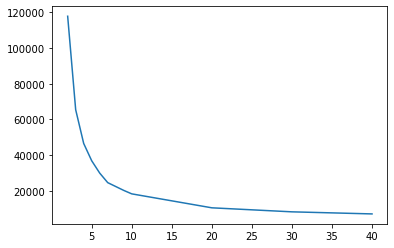

In [283]:
# Plotting inertia vs number of clusters for selecting best value for number of clusters
import matplotlib.pyplot as plt
plt.plot([2,3,4,5,6,7,9,10,20,30,40],inertias)
plt.show()

In [16]:
df1=df_cos.groupby(['Groups']).mean()

In [17]:
df1.idxmax(axis=0)

Adventure             19
Animation              3
Children               3
Comedy                 0
Fantasy                3
Romance                9
Drama                  0
Action                17
Crime                  1
Thriller               1
Horror                 2
Mystery                2
Sci-Fi                15
IMAX                  10
Documentary            7
War                   11
Musical                9
Western                4
Film-Noir             14
(no genres listed)     4
dtype: int64

In [ ]:
# Cluster 1 is grouped for Horror movies
# Cluster 2 is grouped for Western movies
# Cluster 0 is grouped for Crime and drama movies
# Cluster 7 is grouped for Documentary movies
# Cluster 19 is grouped for Adventure and Animation movies
# Cluster 5 is grouped for Action and war combination

In [18]:
# Input any cluster number to see the recommended movies based on cluster
df_cos[df_cos['Groups']==int(input())].index

15


Index(['Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 'Unforgettable (1996)',
       'Body Snatchers (1993)', 'Island of Dr. Moreau, The (1996)',
       'Night of the Living Dead (1968)', 'Lawnmower Man, The (1992)',
       'Alien³ (a.k.a. Alien 3) (1992)', 'The Machine (1994)',
       'Event Horizon (1997)', 'Mimic (1997)',
       ...
       'Maze Runner: The Death Cure (2018)', 'Mute (2018)',
       'The Cloverfield Paradox (2018)', 'Anon (2018)',
       'The First Purge (2018)', 'Upgrade (2018)', 'Hotel Artemis (2018)',
       'Tau', 'The Darkest Minds (2018)', 'The Meg (2018)'],
      dtype='object', name='title', length=198)

## Content based recommender system

In [20]:
import pandas as pd
import numpy as np

In [21]:
movies = pd.read_csv(r"C:\Users\Sumeet\Documents\Temp Run File\movies.csv")

In [22]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
tags = pd.read_csv(r"C:\Users\Sumeet\Documents\Temp Run File\tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [24]:
# create a mixed dataframe of movies title, genres 
# and all user tags given to each movie
mixed = pd.merge(movies, tags, on='movieId', how='left')
mixed.head(3)

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1.525286e+09


In [25]:
# create metadata from tags and genres
mixed.fillna("", inplace=True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(
                             lambda x: "%s" % ' '.join(x)))


In [26]:
Final = pd.merge(movies, mixed, on='movieId', how='left')
Final ['metadata'] = Final[['tag', 'genres']].apply(
                             lambda x: ' '.join(x), axis = 1)
Final[['movieId','title','metadata']].head(3)

,movieId,title,metadata
0,1,Toy Story (1995),pixar pixar fun Adventure|Animation|Children|C...
1,2,Jumanji (1995),fantasy magic board game Robin Williams game A...
2,3,Grumpier Old Men (1995),moldy old Comedy|Romance


In [27]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
Final['metadata'] = Final['metadata'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(Final['metadata'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(9742, 1677)

In [28]:
#Array mapping from feature integer indices to feature name.
tfidf.get_feature_names()[1670:1677]

['younger', 'zellweger', 'zither', 'zoe', 'zombie', 'zombies', 'zooey']

In [29]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [30]:
cosine_sim.shape

(9742, 9742)

In [31]:
cosine_sim[1]

array([0.08807678, 1.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

In [32]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(Final.index, index=Final['title']).drop_duplicates()

In [33]:
indices[:10]

title
Toy Story (1995)                      0
Jumanji (1995)                        1
Grumpier Old Men (1995)               2
Waiting to Exhale (1995)              3
Father of the Bride Part II (1995)    4
Heat (1995)                           5
Sabrina (1995)                        6
Tom and Huck (1995)                   7
Sudden Death (1995)                   8
GoldenEye (1995)                      9
dtype: int64

In [34]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return Final['title'].iloc[movie_indices]

In [35]:
get_recommendations('Heat (1995)')

22                       Assassins (1995)
138     Die Hard: With a Vengeance (1995)
417                 Judgment Night (1993)
793                       Die Hard (1988)
1306                     Hard Rain (1998)
1315      Replacement Killers, The (1998)
1325                 U.S. Marshals (1998)
1693                         Ronin (1998)
2062                      No Mercy (1986)
2225      Someone to Watch Over Me (1987)
Name: title, dtype: object

In [36]:
get_recommendations('Toy Story (1995)')

1757                              Bug's Life, A (1998)
2355                                Toy Story 2 (1999)
8695                  Guardians of the Galaxy 2 (2017)
1706                                       Antz (1998)
2809    Adventures of Rocky and Bullwinkle, The (2000)
3000                  Emperor's New Groove, The (2000)
3568                             Monsters, Inc. (2001)
6194                                  Wild, The (2006)
6486                            Shrek the Third (2007)
6948                    Tale of Despereaux, The (2008)
Name: title, dtype: object